In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

## Load dataset

In [5]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [9]:
with open("data/imagenet_labels.txt") as f:
    classes = eval(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'data/imagenet_labels.txt'

In [7]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -P data
!unzip data/cats_and_dogs_filtered.zip -d data

--2025-10-21 11:00:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘data/cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.5MB/s    in 4.0s    

2025-10-21 11:00:21 (16.4 MB/s) - ‘data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  data/cats_and_dogs_filtered.zip
   creating: data/cats_and_dogs_filtered/
  inflating: data/cats_and_dogs_filtered/vectorize.py  
   creating: data/cats_and_dogs_filtered/validation/
   creating: data/cats_and_dogs_filtered/train/
   creating: data/cats_and_dogs_filtered/validation/dogs/
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflati

In [6]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/data.zip

--2025-10-21 11:00:02--  https://storage.googleapis.com/download.tensorflow.org/example_images/data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-10-21 11:00:03 ERROR 403: Forbidden.



In [11]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [15]:
evalset = torchvision.datasets.ImageFolder(root='./data/cats_and_dogs_filtered', transform=transform)

In [18]:
batch_size=1

In [19]:
evalloader = torch.utils.data.DataLoader(evalset, batch_size=batch_size, shuffle=True)

In [21]:
dataiter = iter(evalloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([1, 3, 224, 298])
torch.Size([3, 224, 298])
0


## Load pretrained model

In [22]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:07<00:00, 73.9MB/s]


In [23]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Visualise image

In [24]:
def imshow(img, title):

    std_correction = np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1)
    mean_correction = np.asarray([0.485, 0.456, 0.406]).reshape(3, 1, 1)
    npimg = np.multiply(img.numpy(), std_correction) + mean_correction

    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [31]:
# Manual mapping of ImageNet indices to 'cat' or 'dog' labels
# These are placeholder indices and may need adjustment
imagenet_to_cat_dog = {
    281: 'cat', # example index for a cat breed
    282: 'cat', # example index for another cat breed
    283: 'cat', # example index for another cat breed
    284: 'cat', # example index for another cat breed
    285: 'cat', # example index for another cat breed
    151: 'dog', # example index for a dog breed
    152: 'dog', # example index for another dog breed
    153: 'dog', # example index for another dog breed
    # Add more indices as needed based on the model's predictions for cats and dogs
}


def show_batch_images(dataloader):
    images, _ = next(iter(dataloader))

    outputs = model(images)
    _, pred = torch.max(outputs.data, 1)

    # Map the predicted ImageNet index to 'cat' or 'dog' label
    titles = []
    for idx in pred:
        if idx.item() in imagenet_to_cat_dog:
            titles.append(imagenet_to_cat_dog[idx.item()])
        else:
            titles.append(f'ImageNet Index: {idx.item()}') # Show index if not in mapping

    img = torchvision.utils.make_grid(images)
    imshow(img, title=titles)

    return images, pred

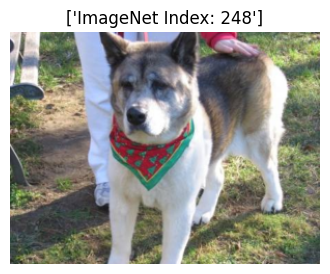

In [34]:
images, pred = show_batch_images(evalloader)

In [30]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/slim/datasets/imagenet_2012_validation_label_map.txt -O imagenet_labels.txt

--2025-10-21 11:18:59--  https://raw.githubusercontent.com/tensorflow/models/master/research/slim/datasets/imagenet_2012_validation_label_map.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-21 11:18:59 ERROR 404: Not Found.



In [27]:
classes = ['cat', 'dog']

## Occlusion analysis

In [37]:
outputs = model(images)
print(outputs.shape)
outputs = nn.functional.softmax(outputs, dim=1)
prob_no_occ, pred = torch.max(outputs.data, 1)
prob_no_occ = prob_no_occ[0].item()
print(prob_no_occ)

torch.Size([1, 1000])
0.613189160823822


In [38]:
def occlusion(model, image, label, occ_size=50, occ_stride=50, occ_pixel=0.5):

    width, height = image.shape[-2], image.shape[-1]

    output_height = int(np.ceil((height-occ_size)/occ_stride))
    output_width = int(np.ceil((width-occ_size)/occ_stride))

    heatmap = torch.zeros((output_height, output_width))

    for h in range(0, height):
        for w in range(0, width):

            h_start = h*occ_stride
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)

            if (w_end) >= width or (h_end) >= height:
                continue

            input_image = image.clone().detach()
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel

            output = model(input_image)
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label]

            heatmap[h, w] = prob

    return heatmap

In [39]:
heatmap = occlusion(model, images, pred[0].item(), 32, 14)

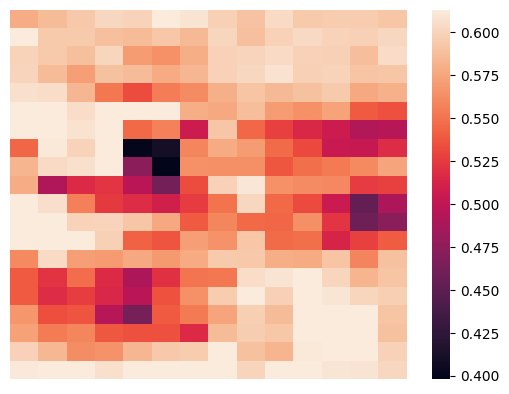

In [40]:
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)

## Filter visualisation

In [41]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 171MB/s]


In [42]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [43]:
def plot_filters_single_channel_big(t):

    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]

    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)

    npimg = npimg.T

    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='Greys', ax=ax, cbar=False)

In [44]:
def plot_filters_single_channel(t):

    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    nrows = 1 + nplots//ncols

    npimg = np.array(t.numpy(), np.float32)

    count = 0

    fig = plt.figure(figsize=(ncols, nrows))
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])

    plt.tight_layout()
    plt.show()

In [45]:
def plot_filters_multi_channel(t):

    num_kernels = t.shape[0]

    num_cols = 12
    num_rows = num_kernels

    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)

        npimg = np.array(t[i].numpy(), np.float32)
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.tight_layout()
    plt.show()

In [46]:
def plot_weights(model, layer_num, single_channel = True, collated = False):

    layer = model.features[layer_num]
    if isinstance(layer, nn.Conv2d):
        weight_tensor = model.features[layer_num].weight.data
        if single_channel:
            if collated:
                plot_filters_single_channel_big(weight_tensor)
            else:
                plot_filters_single_channel(weight_tensor)
        else:
            if weight_tensor.shape[1] == 3:
                plot_filters_multi_channel(weight_tensor)
            else:
                'Can only plot weights with three channels with single_channel = False'
    else:
        print('Can only visualise layers which are convolutional')

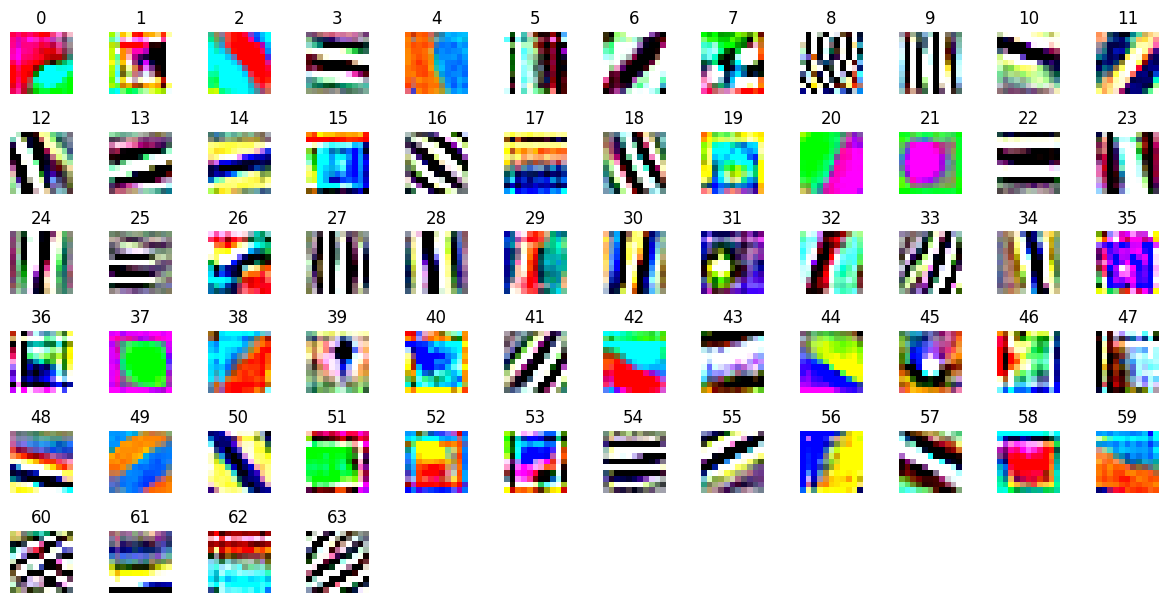

In [47]:
plot_weights(alexnet, 0, single_channel = False)

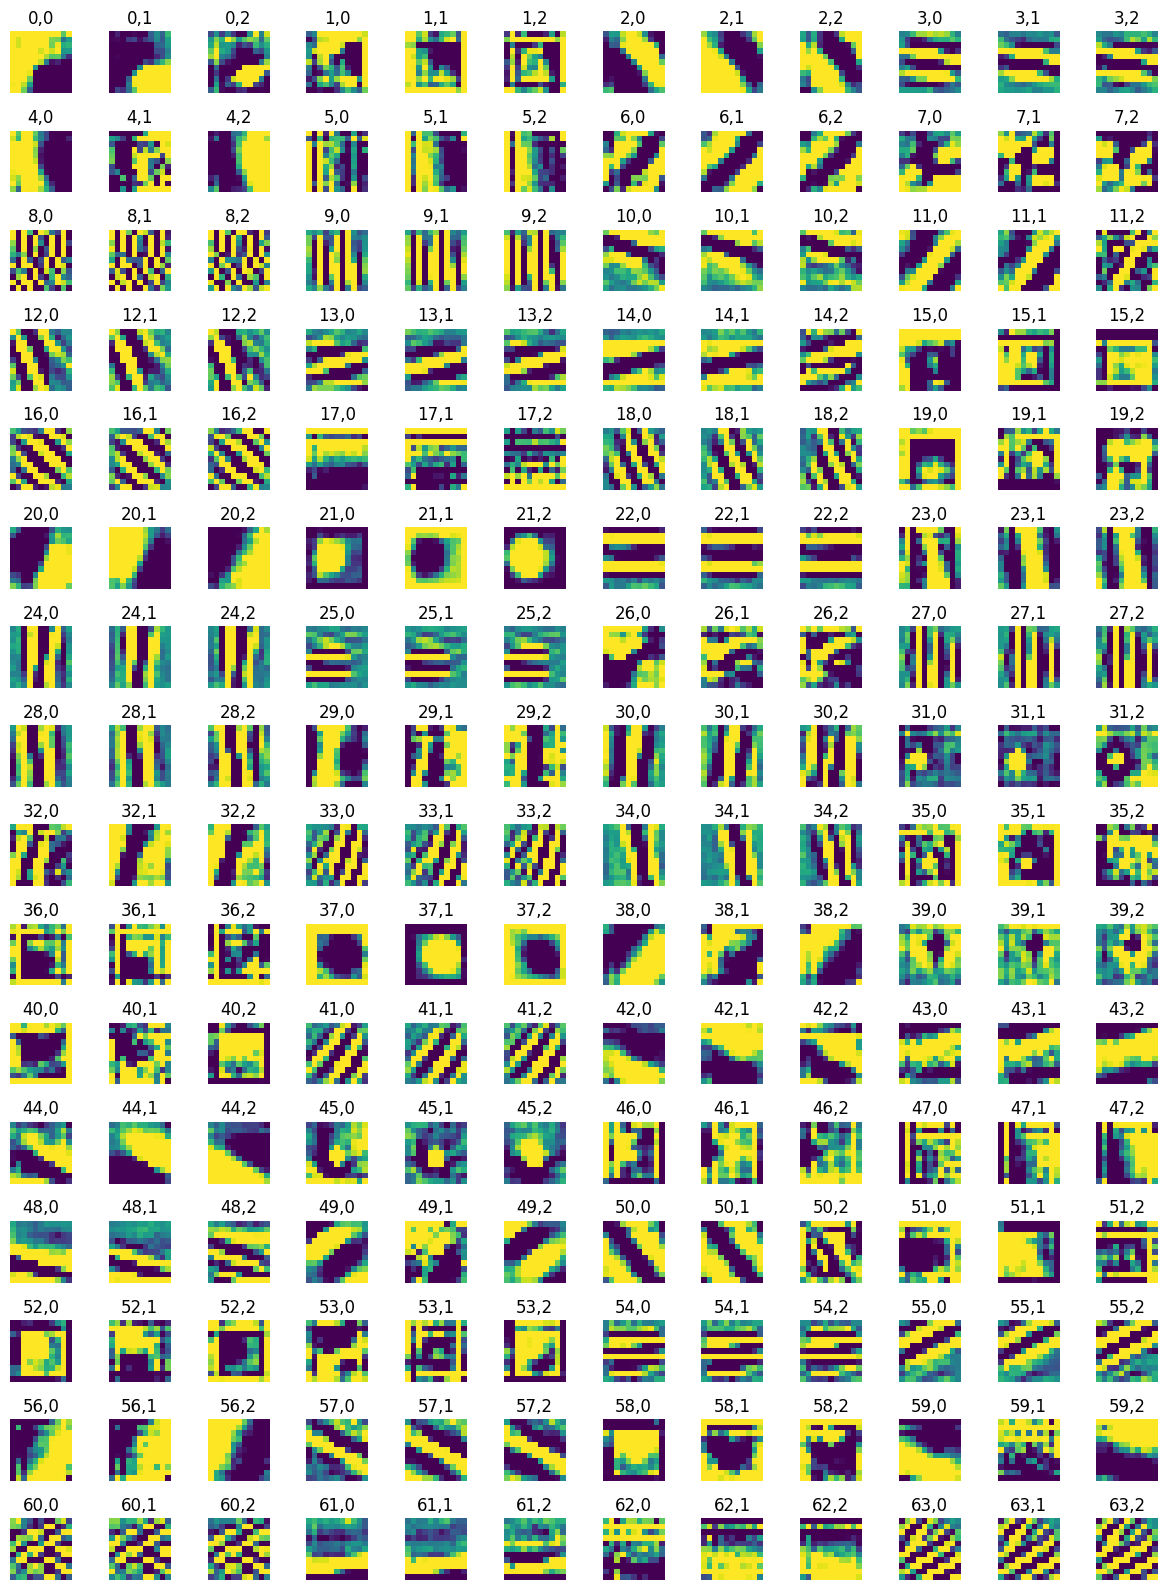

In [48]:
plot_weights(alexnet, 0, single_channel = True)

In [49]:
plot_weights(alexnet, 3, single_channel = True)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79538cfeeac0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79538cfee200> (for post_execute):


KeyboardInterrupt: 

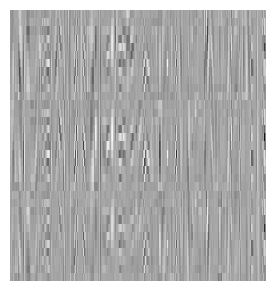

In [50]:
 plot_weights(alexnet, 0, single_channel = True, collated = True)

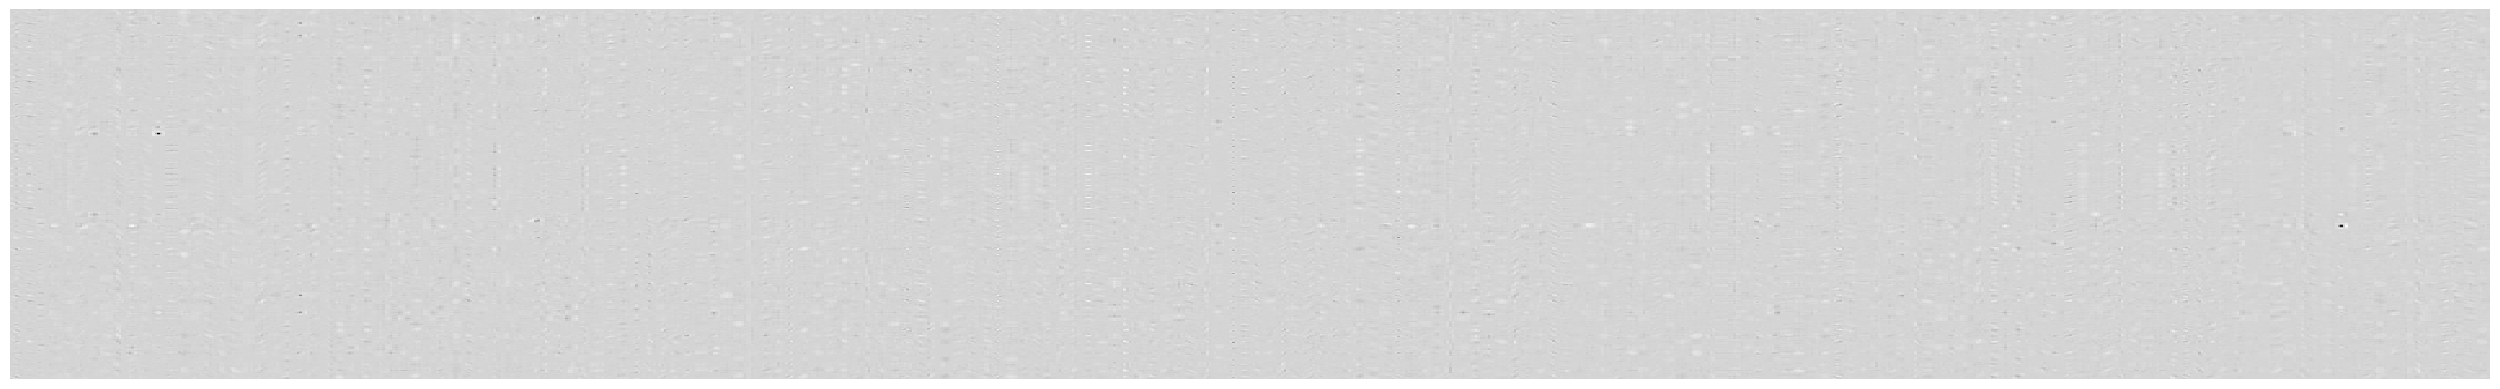

In [51]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

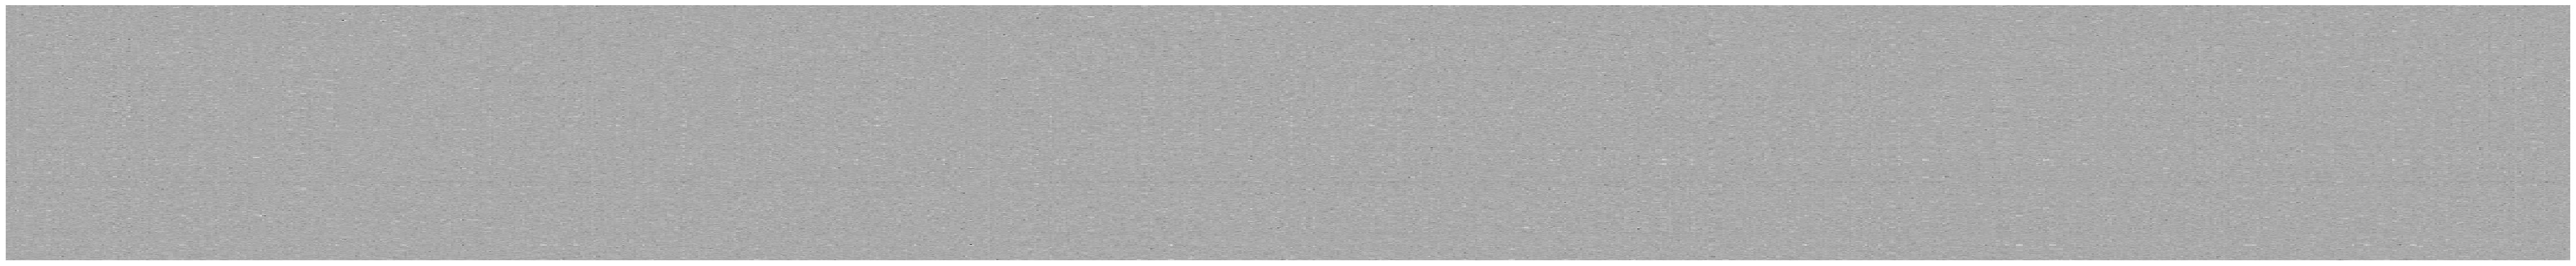

In [52]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

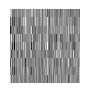

In [53]:
plot_weights(model, 0, single_channel = True, collated = True)

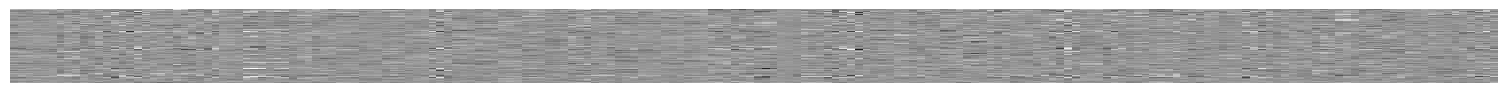

In [54]:
plot_weights(model, 2, single_channel = True, collated = True)

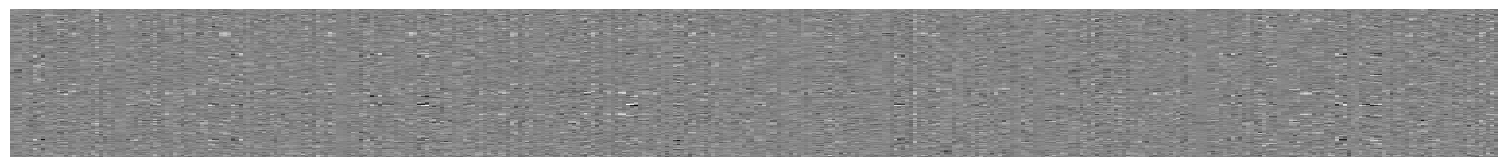

In [55]:
plot_weights(model, 5, single_channel = True, collated = True)